<a href="https://colab.research.google.com/github/graphitical/HeadsUP/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install detectron2

In [1]:
# install dependencies: 
!pip install pyyaml==5.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

1.7.0+cu101 False
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.7)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
import torch
assert torch.__version__.startswith("1.7")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html


In [3]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



# Mount Google Drive

In [25]:
# Use this to mount your google account that has
# access to the shared drive
import os, sys, urllib.request
from google.colab import drive
drive.mount('/gdrive')

# Change dir to shared drive
BASE_PATH = '/gdrive/Shareddrives/deep learning and PDF accessibility/'
os.chdir(BASE_PATH)
!pwd

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/Shareddrives/deep learning and PDF accessibility


In [63]:
# Get model file. Needs improvment
if os.path.exists('configs/'):
  !rm -rf configs/

!mkdir configs/
os.chdir('configs')
!wget -O DLA_mask_rcnn_X_101_32x8d_FPN_3x.yaml https://raw.githubusercontent.com/graphitical/HeadsUP/master/configs/DLA_mask_rcnn_X_101_32x8d_FPN_3x.yaml?token=ADVH3TGDAODD7F2K7WD2Q6S72FCZS
os.chdir(BASE_PATH)

--2020-12-09 21:50:22--  https://raw.githubusercontent.com/graphitical/HeadsUP/master/configs/DLA_mask_rcnn_X_101_32x8d_FPN_3x.yaml?token=ADVH3TGDAODD7F2K7WD2Q6S72FCZS
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2020-12-09 21:50:22 ERROR 404: Not Found.



# Load model

In [107]:
# def setup_cfg(config, opts, thresh):
#     # load config from file and command-line arguments
#     cfg = get_cfg()
#     cfg.merge_from_file(config)
#     cfg.merge_from_list(opts)
#     # Set score_threshold for builtin models
#     cfg.MODEL.RETINANET.SCORE_THRESH_TEST = thresh
#     cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = thresh
#     cfg.MODEL.PANOPTIC_FPN.COMBINE.INSTANCES_CONFIDENCE_THRESH = thresh
#     cfg.freeze()
#     return cfg

# config = BASE_PATH + 'configs/DLA_mask_rcnn_X_101_32x8d_FPN_3x.yaml'
# weights = BASE_PATH + 'configs/resnext101.pth'

MetadataCatalog.get("dla_val").thing_classes = ['text','title','list','table','figure']

config = BASE_PATH + 'configs/DLA_mask_rcnn_R_50_FPN_3x.yaml'
weights = BASE_PATH + 'configs/resnet50.pth'
thresh = 0.5

cfg = get_cfg()
cfg.merge_from_file(config)
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = thresh
cfg.MODEL.WEIGHTS = weights
cfg.MODEL.DEVICE = 'cpu'
predictor = DefaultPredictor(cfg)

WARNING [12/09 23:53:30 d2.config.compat]: Config '/gdrive/Shareddrives/deep learning and PDF accessibility/configs/DLA_mask_rcnn_R_50_FPN_3x.yaml' has no VERSION. Assuming it to be compatible with latest v2.


# Predict

In [108]:
# Likely want to loop here, but can hard code for debugging
fname = BASE_PATH + 'temp/ASSETS_paper/ASSETS_paper-page-1.png'
im = cv2.imread(fname)
# cv2_imshow(im)
outputs = predictor(im)
# print(outputs)

## Visualize

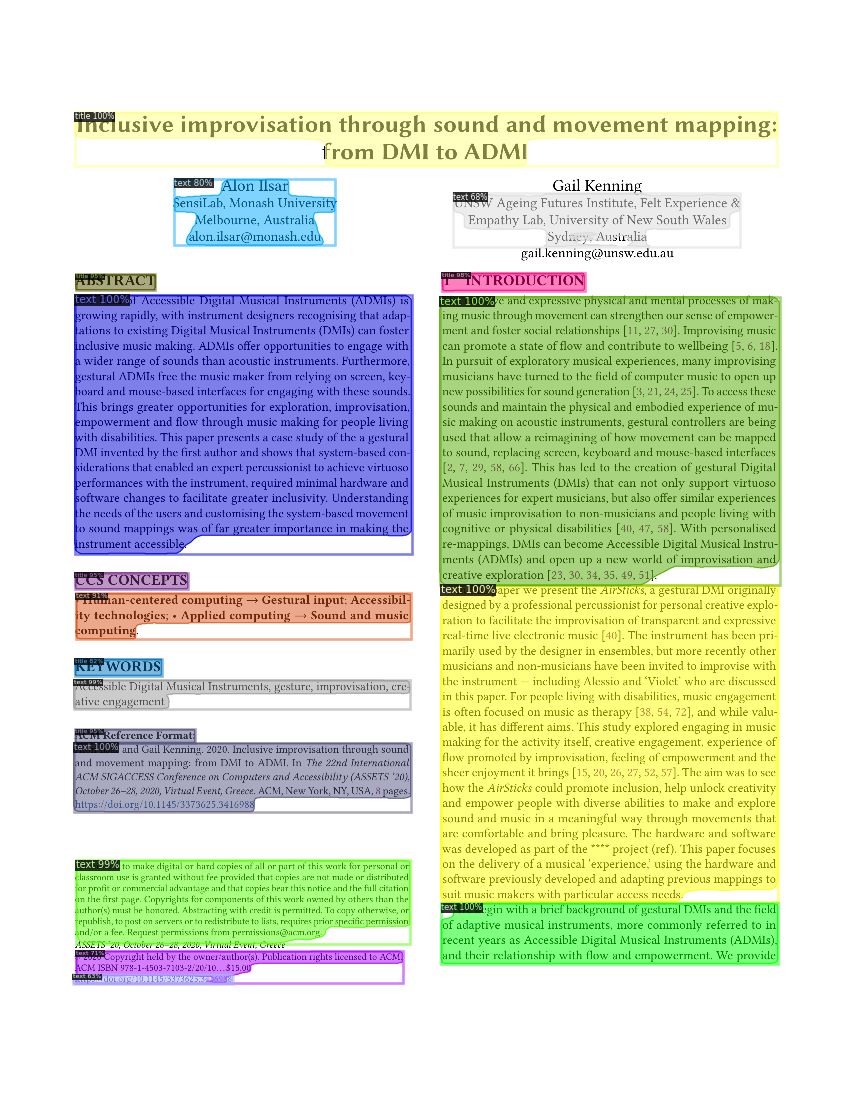

In [109]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get("dla_val"), scale=0.5)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

# Useful references
1. [Fine tune model](https://github.com/hpanwar08/detectron2/issues/25)
